<a href="https://colab.research.google.com/github/statmike/Logistic-Regression/blob/main/04_Logistic_Regression_with_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression - with SKLEARN



Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import linear_model

# add scikit-plot to help with assessment plots
!pip install scikit-plot
import scikitplot as skplt

Load Data

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

digits_df = pd.DataFrame(data=digits.data)
digits_df['target'] = digits.target
digits_df['target_OE'] = digits_df['target'].apply(lambda x : 'Odd' if x%2==1 else ('Even' if x%2==0 else ''))
digits_df['target_OE']

0       Even
1        Odd
2       Even
3        Odd
4       Even
        ... 
1792     Odd
1793    Even
1794    Even
1795     Odd
1796    Even
Name: target_OE, Length: 1797, dtype: object

### Simple, Binary Response
- multivariate (more than one factor, x)
- no missing data
- no variable selection (estimate a parameter for each factor, x)
- no higher order terms (no cross features, interactions, polynomial terms)

In [3]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(digits_df.iloc[:,:64], digits_df.target_OE, test_size=0.25, random_state=32259)

In [4]:
print(y_train)

382     Even
847      Odd
488      Odd
20      Even
729      Odd
        ... 
286     Even
1156    Even
1499    Even
1345    Even
1322     Odd
Name: target_OE, Length: 1347, dtype: object


In [5]:
logisticReg = sk.linear_model.LogisticRegression(max_iter=1000) # bump up  from default of max_iter=100

logisticReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
logisticReg.classes_ # modeling probability of response being Odd

array(['Even', 'Odd'], dtype=object)

In [7]:
logisticReg.coef_

array([[ 0.00000000e+00,  8.30448363e-02, -1.25616549e-01,
         2.27603639e-01, -4.44153182e-02,  2.91930634e-01,
         3.95617767e-01,  2.16255399e-02, -3.91069865e-01,
        -1.84293002e-01,  7.55647859e-02,  3.96827987e-02,
         1.03359479e-01,  6.33035016e-02, -2.32628686e-01,
        -2.35083445e-02,  4.43490944e-01,  8.07740339e-02,
        -2.52009251e-01,  7.78868799e-02,  3.60789242e-02,
        -1.15631226e-01, -4.53878080e-02, -5.77394132e-01,
        -9.90379150e-02, -1.97213447e-02,  5.71540370e-02,
         1.08445308e-01,  1.25146880e-01,  5.91991597e-02,
        -8.47196692e-02,  0.00000000e+00,  0.00000000e+00,
        -3.41829306e-01,  9.04532572e-02,  5.58306648e-02,
        -8.97239894e-02,  3.08734781e-02,  1.45192564e-01,
         0.00000000e+00, -1.04239204e-03,  5.01027102e-02,
        -3.47278415e-01, -2.51291187e-01,  6.99559123e-03,
         5.43885493e-02,  1.22343093e-01, -1.05537851e+00,
        -3.91187608e-06, -2.42225126e-01, -3.15828749e-0

In [8]:
test_score = logisticReg.score(x_test,y_test)
print("Test Score: {0:.2f}%".format(100*test_score))
train_score = logisticReg.score(x_train,y_train)
print("Train Score: {0:.2f}%".format(100*train_score))

Test Score: 90.67%
Train Score: 93.39%


describe the CM and the different stats for interpreting: prec, recall, accuracy, ...

Brier Score: 0.0687813579471202
Precision: 0.9051724137931034
Recall: 0.9130434782608695
Accuracy: 0.9066666666666666
F1: 0.9090909090909092


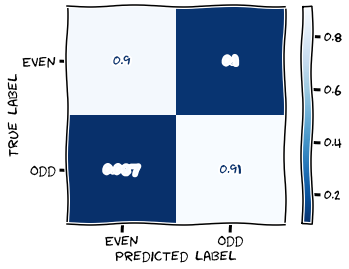

In [9]:
plt.xkcd()
predictions = logisticReg.predict(x_test)
cm = sk.metrics.confusion_matrix(y_test, predictions, normalize='true', labels=logisticReg.classes_)
cmd = sk.metrics.ConfusionMatrixDisplay(cm, display_labels=logisticReg.classes_).plot(cmap='Blues_r')

print("Brier Score:",sk.metrics.brier_score_loss(y_test,logisticReg.predict_proba(x_test)[:,1],pos_label=logisticReg.classes_[1]))
print("Precision:",sk.metrics.precision_score(y_test,logisticReg.predict(x_test),pos_label=logisticReg.classes_[1]))
print("Recall:",sk.metrics.recall_score(y_test,logisticReg.predict(x_test),pos_label=logisticReg.classes_[1]))
print("Accuracy:",sk.metrics.accuracy_score(y_test,logisticReg.predict(x_test)))
print("F1:",sk.metrics.f1_score(y_test,logisticReg.predict(x_test),pos_label=logisticReg.classes_[1]))

In [10]:
print(sk.metrics.classification_report(y_test,logisticReg.predict(x_test)))

              precision    recall  f1-score   support

        Even       0.91      0.90      0.90       220
         Odd       0.91      0.91      0.91       230

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



describe ROC: lazy= 1 for everything get TP=1 and FP=1 or 0 for everything (FP=zero and TP=zero). Goal is to max TP > FP. Very sincitive model gets high TP with very low FP. https://morioh.com/p/2298e2750226

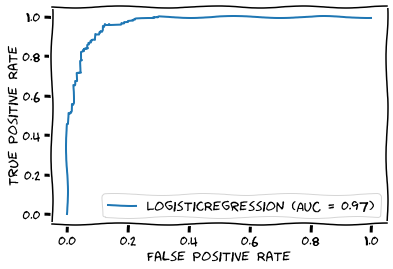

In [11]:
logistic_roc = sk.metrics.plot_roc_curve(logisticReg,x_test, y_test)

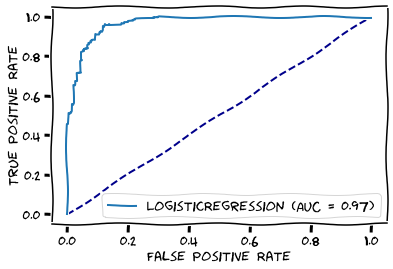

In [12]:
ax = plt.gca()
guessing = plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
logistic_roc.plot(ax=ax)

describe precision-recall: if you have class imbalance then the ROC curve can appear a bit optimistic!  Note that ROC only uses one column of the CM matrix while accuracy and precision use both columns. Recall =true pos rate =tp/(tp+fn), Precision=positive predicive value=tp/ap

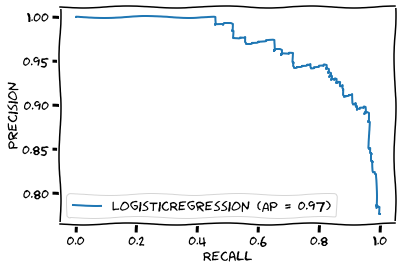

In [13]:
sk.metrics.plot_precision_recall_curve(logisticReg,x_test,y_test)

Text(0, 0.5, 'Probability of being Odd Number Digit')

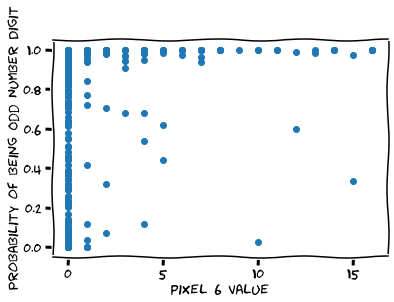

In [14]:
pixel =6
y_score=logisticReg.predict_proba(x_test)[:,1]
plt.scatter(x_test.iloc[:,pixel],y_score)
plt.xlabel("pixel {} value".format(pixel))
plt.ylabel("Probability of being Odd Number Digit")

### Simple, Multiclass (3 or more responses)
- multivariate
- no missing data
- no variable selection
- no higher order terms

In [15]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(digits_df.iloc[:,:64], digits_df.target, test_size=0.25, random_state=32259)

logisticRegMulti = sk.linear_model.LogisticRegression(max_iter=3000) # bump up  from default of max_iter=100

logisticRegMulti.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
test_score = logisticRegMulti.score(x_test,y_test)
print("Test Score: {0:.2f}%".format(100*test_score))
train_score = logisticRegMulti.score(x_train,y_train)
print("Train Score: {0:.2f}%".format(100*train_score))

Test Score: 98.00%
Train Score: 100.00%


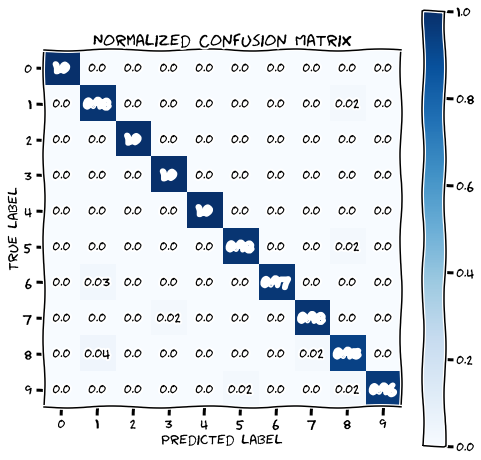

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
skplt.metrics.plot_confusion_matrix(y_test, logisticRegMulti.predict(x_test), normalize=True, ax=ax)

In [18]:
print(logisticRegMulti.classes_)
print(sk.metrics.classification_report(y_test,logisticRegMulti.predict(x_test)))

[0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.98      0.96        53
           2       1.00      1.00      1.00        40
           3       0.98      1.00      0.99        47
           4       1.00      1.00      1.00        54
           5       0.97      0.97      0.97        40
           6       1.00      0.97      0.99        38
           7       0.97      0.97      0.97        40
           8       0.93      0.93      0.93        45
           9       1.00      0.96      0.98        50

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



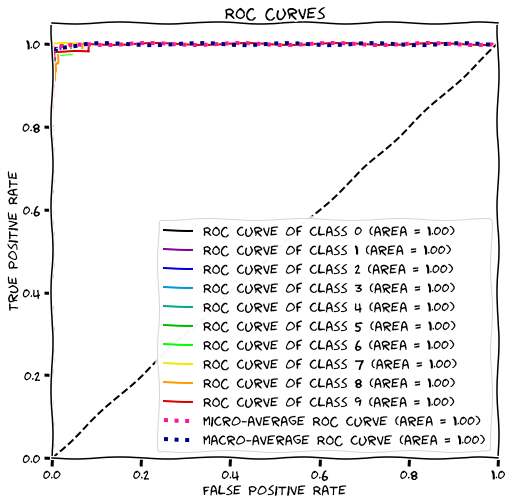

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
skplt.metrics.plot_roc(y_test, logisticRegMulti.predict_proba(x_test), ax=ax)

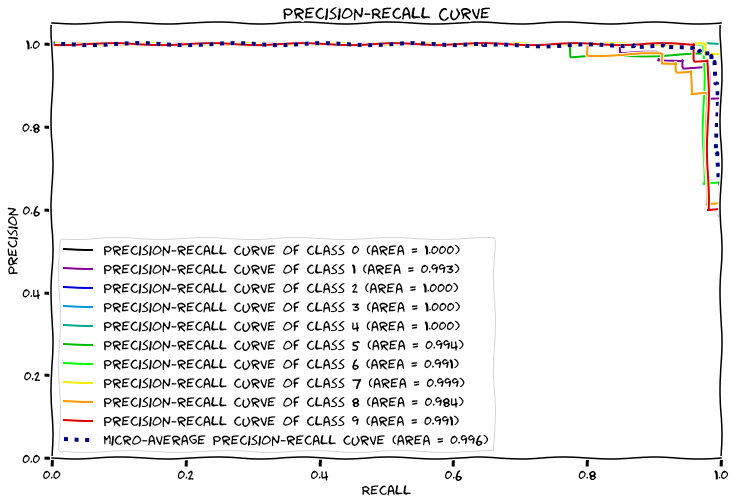

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
skplt.metrics.plot_precision_recall(y_test,logisticRegMulti.predict_proba(x_test), ax=ax)